In [1]:
#ground truth human labeled cluster
clusters_gt = [['Accomplished','Proud','Success','Insecurity','Fear','Feelings of Growth','Exciting','Inspirational','Scary','Motivational','Stressed','Worked with Others Outside Group','Getting Help from Others','Experience with Team During SRA','Enjoyed Collaborating','Enjoyed Meeting People with Similar Interests','Bonding with Colleagues','Collaborative Environment','Hands on Experience','Interactive Experience','Perspective on College','Comparing High School to College','Perspective on Deadlines','Perception of Peers','Competitive Environment for College Apps','Participants Describing the Experience'],['Figuring Things Out On Your Own','Achieving Accuracy','Solving New Problems','Finishing a Polished Project','Finding New Solutions','Increased Confidence','Lowered Confidence','Learning From Others','Development of Growth Mindset','Developed Work Ethic','Developed Discipline','Self Reliance'],['Developed Perseverance','Time Management','Organization','Academic Rigor','Discover Passions','Computer Programming','Social Life','Taking Initiative','Find and Join Academic Clubs','Assigning Work/Tasks','Stay Organized and Avoid Procrastinating','Unstructured Learning','Attempting to Solve Before Getting Help','Structured Learning','Find Solutions Using the Internet','Learning From Diverse Resources','Taking Breaks','Asking for Help','Collaborating','Taking Courses','Publishing Research Paper','Programming complex algorithms','Working with New Programs','Debugging','Building Programming Skills','Learning Course Material','Rigorousness of Program','Enhancing Accuracy of Model','Finding Good Data','Short Timeframe for Project Completion','Evaluating Research Correctness','Idea for What Project to Do','Waking Up Early','Gaining Intuition About a Concept','Doing Outside Research','Adjusting to New Environment','Time Management','Learning to find resources','Effective organization','Project Management','Problem Solving Skills','Critical Thinking Skills','Organizing Collaborative Projects','Increased Focus on Self Led Projects','Learning How to Build a Mathematical model','Skills for Computer Vision Development','Learned How to Build a Neural Network Model','Learned About Research Process','Learning How Code','Learning About Machine Learning'],['Discovering Passions','Used Knowledge from Program Later on in School','Participant Joining Clubs','Achievement','Partcipating in Other Research Projects','Participant Teaching Others','Planned Major and Choice of Career']]
for i in range(2    ):
    print('k =', i)
    print(len(clusters_gt[i]))

k = 0
26
k = 1
12


In [ ]:
#calculate the accuracy of the clustering
def accuracy(cluster, ground_truth):
    count = 0
    for word in cluster:
        if word in ground_truth:
            count += 1
    return count/len(cluster)

: 

In [ ]:
# Install necessary libraries if not already installed
# !pip install sentence-transformers scikit-learn matplotlib seaborn

from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
import pandas as pd

# Your list of words
words_list = ['Accomplished','Proud','Success','Insecurity','Fear','Feelings of Growth','Exciting','Inspirational','Scary','Motivational','Stressed','Worked with Others Outside Group','Getting Help from Others','Experience with Team During SRA','Enjoyed Collaborating','Enjoyed Meeting People with Similar Interests','Bonding with Colleagues','Collaborative Environment','Hands on Experience','Interactive Experience','Perspective on College','Comparing High School to College','Perspective on Deadlines','Perception of Peers','Competitive Environment for College Apps','Participants Describing the Experience','Figuring Things Out On Your Own','Achieving Accuracy','Solving New Problems','Finishing a Polished Project','Finding New Solutions','Increased Confidence','Lowered Confidence','Learning From Others','Development of Growth Mindset','Developed Work Ethic','Developed Discipline','Self Reliance','Developed Perseverance','Time Management','Organization','Academic Rigor','Discover Passions','Computer Programming','Social Life','Taking Initiative','Find and Join Academic Clubs','Assigning Work/Tasks','Stay Organized and Avoid Procrastinating','Unstructured Learning','Attempting to Solve Before Getting Help','Structured Learning','Find Solutions Using the Internet','Learning From Diverse Resources','Taking Breaks','Asking for Help','Collaborating','Taking Courses','Publishing Research Paper','Programming complex algorithms','Working with New Programs','Debugging','Building Programming Skills','Learning Course Material','Rigorousness of Program','Enhancing Accuracy of Model','Finding Good Data','Short Timeframe for Project Completion','Evaluating Research Correctness','Idea for What Project to Do','Waking Up Early','Gaining Intuition About a Concept','Doing Outside Research','Adjusting to New Environment','Time Management','Learning to find resources','Effective organization','Project Management','Problem Solving Skills','Critical Thinking Skills','Organizing Collaborative Projects','Increased Focus on Self Led Projects','Learning How to Build a Mathematical model','Skills for Computer Vision Development','Learned How to Build a Neural Network Model','Learned About Research Process','Learning How Code','Learning About Machine Learning','Discovering Passions','Used Knowledge from Program Later on in School','Participant Joining Clubs','Achievement','Partcipating in Other Research Projects','Participant Teaching Others','Planned Major and Choice of Career']

words = [word for word in words_list if word not in clusters_gt[3]]
# Initialize the model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Generate embeddings
embeddings = model.encode(words)

# Define number of clusters
num_clusters = 3  # Adjust as needed

# Initialize and fit K-Means
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(embeddings)
clusters = kmeans.labels_

# Organize words by cluster
clustered_words = defaultdict(list)
for word, cluster in zip(words, clusters):
    clustered_words[cluster].append(word)

# Print clusters
for cluster_id, cluster_words in clustered_words.items():
    print(f"Cluster {cluster_id + 1}: {', '.join(cluster_words)}")

# Optional: Visualize the clusters
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

df = pd.DataFrame({
    'Word': words,
    'X': reduced_embeddings[:, 0],
    'Y': reduced_embeddings[:, 1],
    'Cluster': clusters
})

plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='X', y='Y', hue='Cluster', palette='viridis', s=100)

for i in range(df.shape[0]):
    plt.text(df.X[i]+0.02, df.Y[i]+0.02, df.Word[i], fontsize=9)

plt.title('Word Clusters Based on Semantic Meaning')
plt.show()


In [ ]:
#print length of each clusters
for cluster_id, cluster_words in clustered_words.items():
    print(f"Cluster {cluster_id + 1}: {len(cluster_words)}")
    for k in range(4):
        print('Accuracy:', accuracy(clustered_words[cluster_id], clusters_gt[k]))





Cluster 1: 23
Accuracy: 0.6086956521739131
Accuracy: 0.17391304347826086
Accuracy: 0.21739130434782608
Accuracy: 0.0
Cluster 3: 35
Accuracy: 0.34285714285714286
Accuracy: 0.08571428571428572
Accuracy: 0.5714285714285714
Accuracy: 0.0
Cluster 2: 30
Accuracy: 0.0
Accuracy: 0.16666666666666666
Accuracy: 0.8333333333333334
Accuracy: 0.0


Theme 2: Self Efficacy: Problem Solving Skills, Time Management, Time Management, Increased Focus on Self Led Projects, Self Reliance, Developed Work Ethic, Find Solutions Using the Internet, Stay Organized and Avoid Procrastinating, Attempting to Solve Before Getting Help, Developed Perseverance, Assigning Work/Tasks, Figuring Things Out On Your Own, Solving New Problems, Debugging, Finishing a Polished Project, Adjusting to New Environment, Finding New Solutions, Critical Thinking Skills, Evaluating Research Correctness, Academic Rigor, Short Timeframe for Project Completion, Waking Up Early, Project Management, Learned About Research Process, Taking Initiative, Developed Discipline, Taking Breaks, Development of Growth Mindset, Perspective on Deadlines, Stressed
Theme 3: Career Readiness: Competitive Environment for College Apps, Discover Passions, Enhancing Accuracy of Model, Learning Course Material, Finding Good Data, Gaining Intuition About a Concept, Used Knowledge from Program

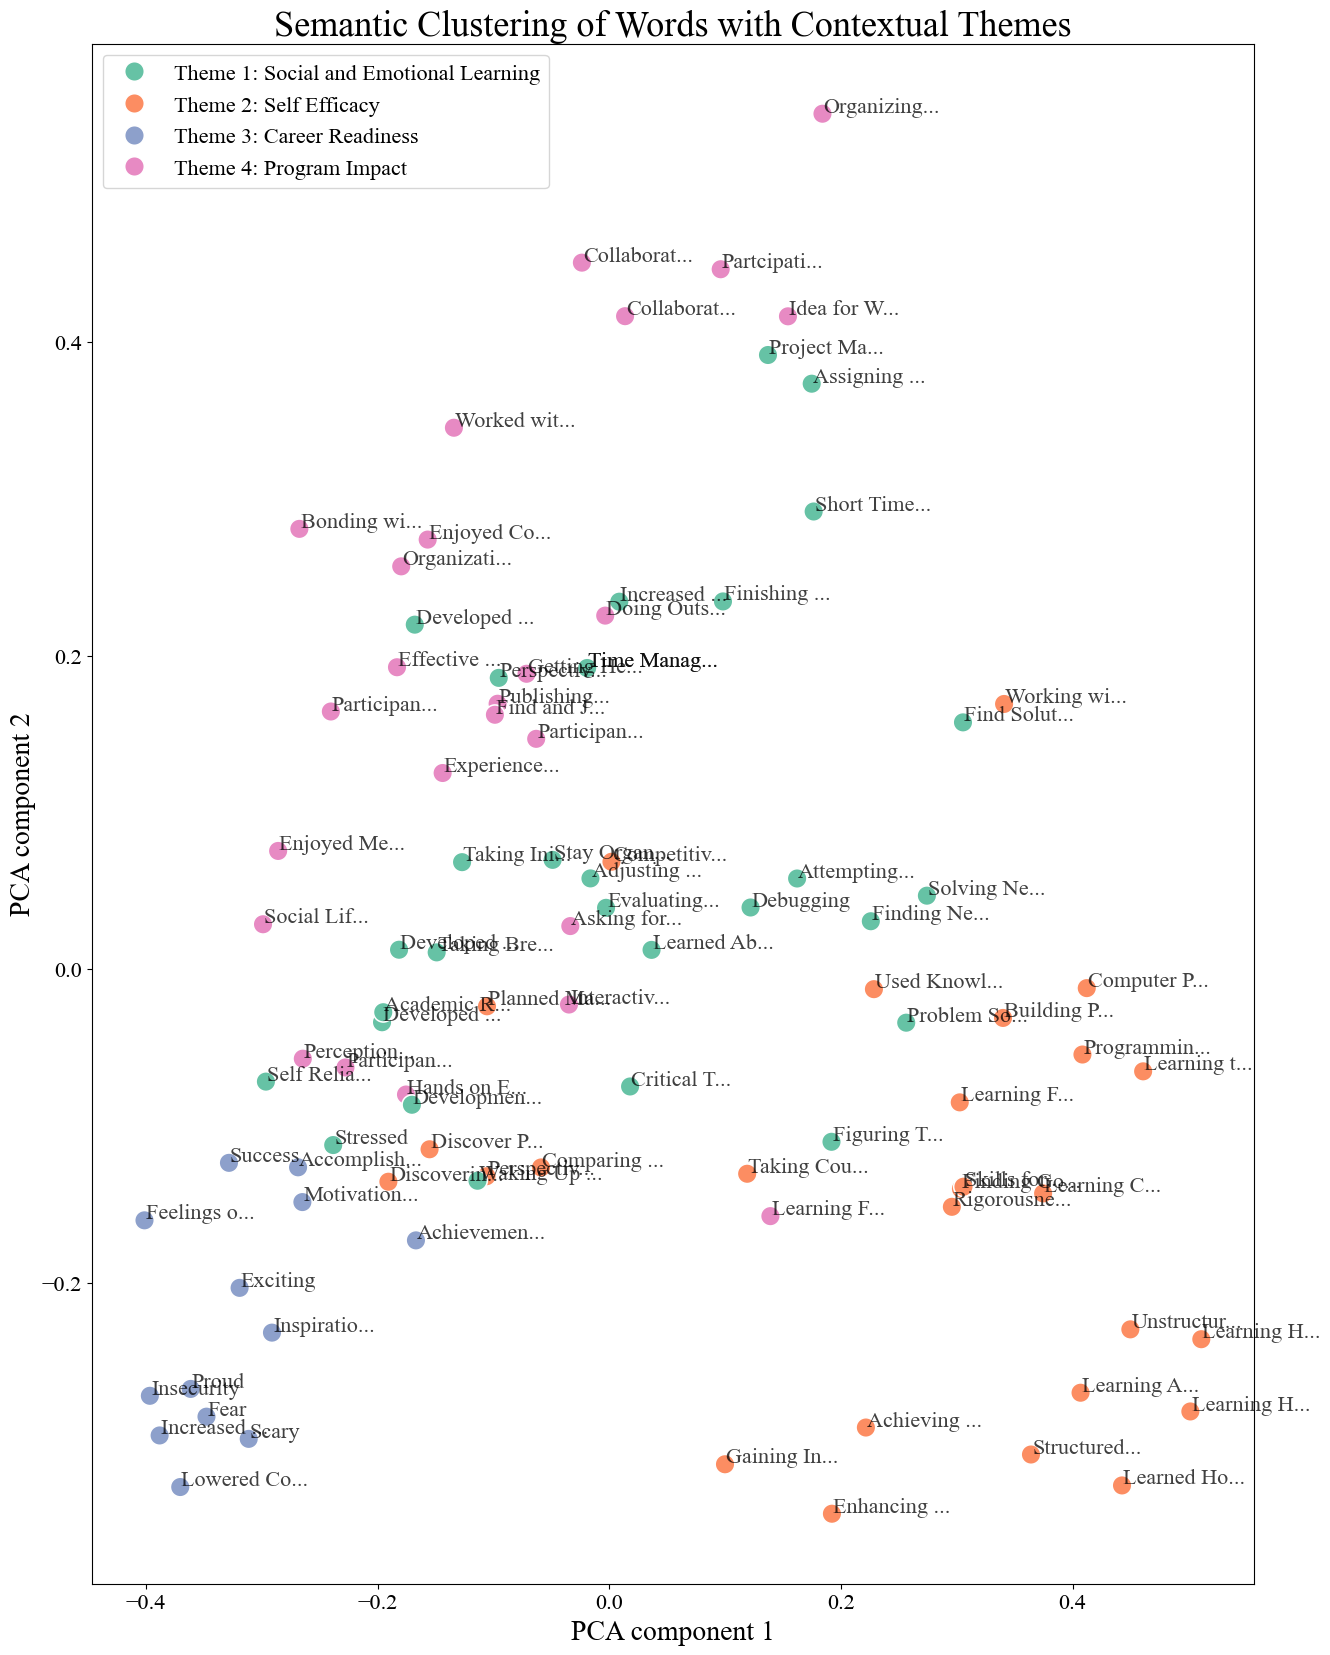

In [ ]:
# Install necessary libraries if not already installed
# !pip install sentence-transformers scikit-learn matplotlib seaborn pandas

from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
import numpy as np
import pandas as pd

# 1. Define seed words for each theme
theme_seeds = {
    'Theme 1: Social and Emotional Learning ': ['Exciting','Inspirational','Scary'],
    'Theme 2: Self Efficacy': ['Solving New Problems','Finishing a Polished Project', 'Self Reliance'],
    'Theme 3: Career Readiness': ['Academic Rigor','Discover Passions','Computer Programming'],
    'Theme 4: Program Impact': ['Participant Joining Clubs','Achievement','Partcipating in Other Research Projects','Participant Teaching Others']
}

# 2. List of words to cluster (include seed words)
words = ['Accomplished','Proud','Success','Insecurity','Fear','Feelings of Growth','Exciting','Inspirational','Scary','Motivational','Stressed','Worked with Others Outside Group','Getting Help from Others','Experience with Team During SRA','Enjoyed Collaborating','Enjoyed Meeting People with Similar Interests','Bonding with Colleagues','Collaborative Environment','Hands on Experience','Interactive Experience','Perspective on College','Comparing High School to College','Perspective on Deadlines','Perception of Peers','Competitive Environment for College Apps','Participants Describing the Experience','Figuring Things Out On Your Own','Achieving Accuracy','Solving New Problems','Finishing a Polished Project','Finding New Solutions','Increased Confidence','Lowered Confidence','Learning From Others','Development of Growth Mindset','Developed Work Ethic','Developed Discipline','Self Reliance','Developed Perseverance','Time Management','Organization','Academic Rigor','Discover Passions','Computer Programming','Social Life','Taking Initiative','Find and Join Academic Clubs','Assigning Work/Tasks','Stay Organized and Avoid Procrastinating','Unstructured Learning','Attempting to Solve Before Getting Help','Structured Learning','Find Solutions Using the Internet','Learning From Diverse Resources','Taking Breaks','Asking for Help','Collaborating','Taking Courses','Publishing Research Paper','Programming complex algorithms','Working with New Programs','Debugging','Building Programming Skills','Learning Course Material','Rigorousness of Program','Enhancing Accuracy of Model','Finding Good Data','Short Timeframe for Project Completion','Evaluating Research Correctness','Idea for What Project to Do','Waking Up Early','Gaining Intuition About a Concept','Doing Outside Research','Adjusting to New Environment','Time Management','Learning to find resources','Effective organization','Project Management','Problem Solving Skills','Critical Thinking Skills','Organizing Collaborative Projects','Increased Focus on Self Led Projects','Learning How to Build a Mathematical model','Skills for Computer Vision Development','Learned How to Build a Neural Network Model','Learned About Research Process','Learning How Code','Learning About Machine Learning','Discovering Passions','Used Knowledge from Program Later on in School','Participant Joining Clubs','Achievement','Partcipating in Other Research Projects','Participant Teaching Others','Planned Major and Choice of Career']
# words = [word for word in words if word not in clusters_gt[3]]
#shuffle words
np.random.shuffle(words)


# 3. Initialize the model
model = SentenceTransformer('all-MiniLM-L6-v2')

# 4. Generate embeddings for words
word_embeddings = model.encode(words)

# 5. Compute Theme centers based on seed words
Theme_centers = []
Theme_labels = []

for Theme, seeds in theme_seeds.items():
    seed_embeddings = model.encode(seeds)
    center = np.mean(seed_embeddings, axis=0)
    Theme_centers.append(center)
    Theme_labels.append(Theme)

theme_centers = np.array(Theme_centers)

# 6. Initialize and fit K-Means with predefined centers
num_clusters = len(theme_seeds)
kmeans = KMeans(n_clusters=num_clusters, init=theme_centers, n_init=1, random_state=42)
kmeans.fit(word_embeddings)
clusters = kmeans.labels_

# 7. Organize words by cluster
clustered_words = defaultdict(list)
for word, cluster in zip(words, clusters):
    theme = Theme_labels[cluster]
    clustered_words[theme].append(word)

# 8. Print the clusters
for theme, cluster_words in clustered_words.items():
    print(f"{theme}: {', '.join(cluster_words)}")

# 9. Optional: Visualize the clusters
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(word_embeddings)

trimmed_word = []
for word in words:
    print(word, len(word))
    if len(word) > 10:
        trimmed_word.append(word[:10]+"...")
    else:
        trimmed_word.append(word)

df = pd.DataFrame({
    'Word': trimmed_word,
    'X': reduced_embeddings[:, 0],
    'Y': reduced_embeddings[:, 1],
    'Theme': [Theme_labels[cluster] for cluster in clusters]
})

plt.rcParams['font.family'] = 'Times New Roman'
plt.figure(figsize=(15, 20))
sns.scatterplot(data=df, x='X', y='Y', hue='Theme', palette='Set2', s=200)

for idx, row in df.iterrows():
    plt.text(row['X'] + 0.001, row['Y'] + 0.001, row['Word'], fontsize=16, alpha=0.75)

plt.title('Semantic Clustering of Words with Contextual Themes', fontsize=26)
plt.xlabel('PCA component 1', fontsize=20)
plt.ylabel('PCA component 2', fontsize=20)
plt.tick_params(labelsize=16)
# plt.legend(title='Theme', title_fontsize='20', fontsize='20')
#legend of theme should be sorted
legend = plt.legend(fontsize='16')  
legend.get_texts()[0].set_text('Theme 1: Social and Emotional Learning')
legend.get_texts()[1].set_text('Theme 2: Self Efficacy')
legend.get_texts()[2].set_text('Theme 3: Career Readiness')
legend.get_texts()[3].set_text('Theme 4: Program Impact')
legend.set_loc('upper left')
plt.show()




In [ ]:
#print length of each clusters
for theme, cluster_words in clustered_words.items():
    print(f"{theme}: {len(cluster_words)}")
    for k in [0,1,2,3]:
        print('Accuracy:', np.round(accuracy(clustered_words[theme], clusters_gt[k]),2))
#create latex code for table of accuracy
#print first row in latex
print("Theme & Cluster Size & Accuracy wrt manual theme 1 & Accuracy wrt manual theme 2 & Accuracy wrt manual theme 3 & Accuracy wrt manual theme 4 \\\\")
for theme, cluster_words in clustered_words.items():
    print(f"{theme} & {len(cluster_words)} & {np.round(accuracy(clustered_words[theme], clusters_gt[0]),2)} & {np.round(accuracy(clustered_words[theme], clusters_gt[1]),2)} & {np.round(accuracy(clustered_words[theme], clusters_gt[2]),2)} & {np.round(accuracy(clustered_words[theme], clusters_gt[3]),2)} \\\\")




Theme 2: Self Efficacy: 30
Accuracy: 0.07
Accuracy: 0.27
Accuracy: 0.67
Accuracy: 0.0
Theme 3: Career Readiness: 27
Accuracy: 0.11
Accuracy: 0.04
Accuracy: 0.74
Accuracy: 0.11
Theme 1: Social and Emotional Learning : 13
Accuracy: 0.77
Accuracy: 0.15
Accuracy: 0.0
Accuracy: 0.08
Theme 4: Program Impact: 25
Accuracy: 0.44
Accuracy: 0.04
Accuracy: 0.4
Accuracy: 0.12
Theme & Cluster Size & Accuracy wrt manual theme 1 & Accuracy wrt manual theme 2 & Accuracy wrt manual theme 3 & Accuracy wrt manual theme 4 \\
Theme 2: Self Efficacy & 30 & 0.07 & 0.27 & 0.67 & 0.0 \\
Theme 3: Career Readiness & 27 & 0.11 & 0.04 & 0.74 & 0.11 \\
Theme 1: Social and Emotional Learning  & 13 & 0.77 & 0.15 & 0.0 & 0.08 \\
Theme 4: Program Impact & 25 & 0.44 & 0.04 & 0.4 & 0.12 \\


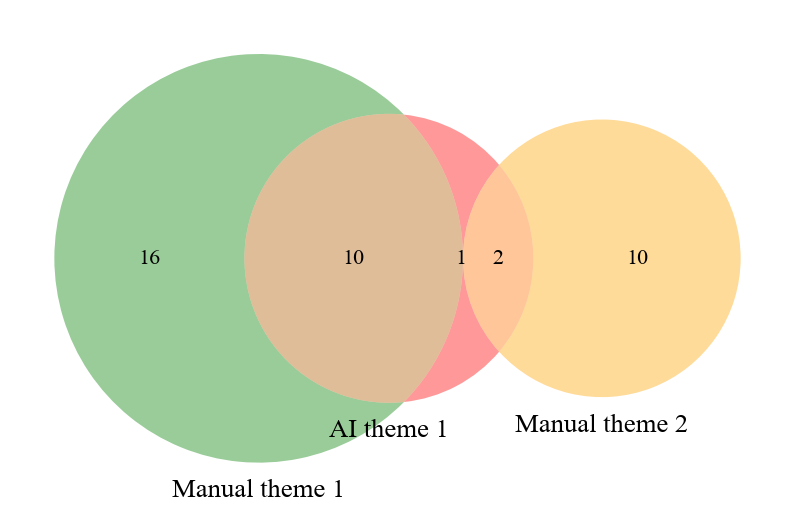

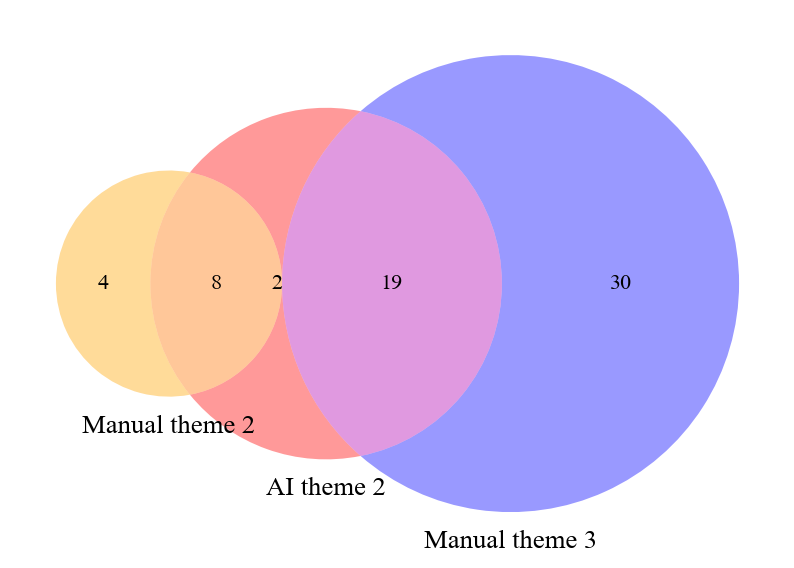

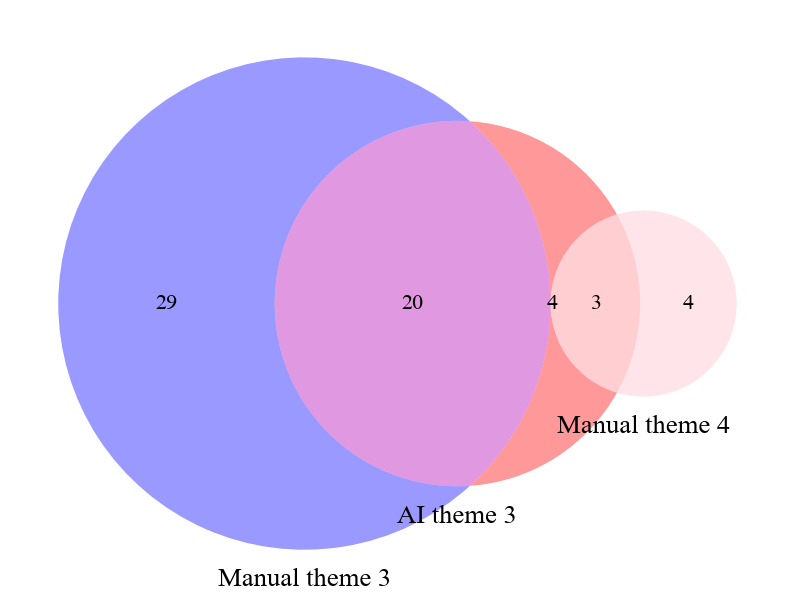

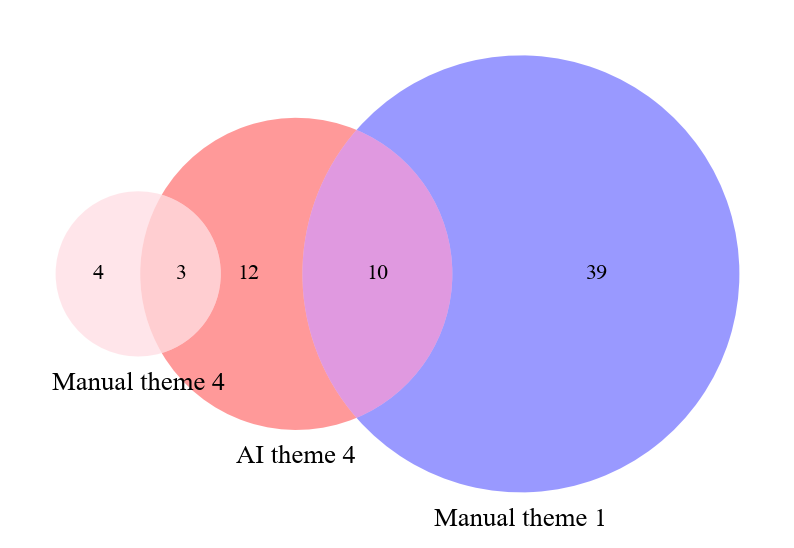

In [ ]:
#plot overlap of clusters
from matplotlib_venn import venn3

# Define the sets
phase1 = set(clustered_words['Theme 1: Social and Emotional Learning '])
phase2 = set(clustered_words['Theme 2: Self Efficacy'])
phase3 = set(clustered_words['Theme 3: Career Readiness'])
phase4 = set(clustered_words['Theme 4: Program Impact'])
set1 = set(clusters_gt[0])
set2 = set(clusters_gt[1])
set3 = set(clusters_gt[2])
set4 = set(clusters_gt[3])
plt.figure(figsize=(10, 7))
#set fontsize as 16
plt.rcParams.update({'font.size': 16})

#set colors of manual theme
colors = {"set1": "green", "set2": "orange", "set3": "blue", "set4": "pink", "phase1": "red", "phase2": "red", "phase3": "red", "phase4": "red"}

plt.rcParams['font.family'] = 'Times New Roman'

venn3([phase1, set1, set2 ], ('AI theme 1', 'Manual theme 1', 'Manual theme 2'), set_colors=(colors["phase1"], colors["set1"], colors["set2"]))
# plt.title('Overlap of Clusters')
#save svg 300 dpi]
# plt.legend(title='Themes', title_fontsize='20', fontsize='20')
plt.savefig('theme1.svg', format='svg', dpi=300)

plt.figure(figsize=(10, 10))
venn3([phase2, set2, set3], ('AI theme 2', 'Manual theme 2', 'Manual theme 3'), set_colors=(colors["phase2"], colors["set2"], colors["set3"]))
plt.savefig('theme2.svg', format='svg', dpi=300)
# plt.title('Overlap of Clusters')

plt.figure(figsize=(10, 10))
venn3([phase3, set3, set4], ('AI theme 3', 'Manual theme 3', 'Manual theme 4'), set_colors=(colors["phase3"], colors["set3"], colors["set4"]))
plt.savefig('theme3.svg', format='svg', dpi=300)
# plt.title('Overlap of Clusters')

plt.figure(figsize=(10, 10))
venn3([phase4, set4, set3], ('AI theme 4', 'Manual theme 4', 'Manual theme 1'), set_colors=(colors["phase4"], colors["set4"], colors["set3"]))
plt.savefig('theme4.svg', format='svg', dpi=300)
# plt.title('Overlap of Clusters')






# # set3 = set(clustered_words['Phase 3: Career Readiness'])
# # set4 = set(clustered_words['Phase 4: Program Impact'])

# # Create the Venn diagram
# plt.figure(figsize=(10, 10))
# venn2([set1, set2], ('Phase 1 code', 'Phase 2 manual'))

# set1 = set(clustered_words['Phase 2: Self Efficacy'])
# set2 = set(clusters_gt[1])
# plt.figure(figsize=(10, 10))
# venn2([set1, set2], ('Phase 2 code', 'Phase 2 manual'))

# set1 = set(clustered_words['Phase 3: Career Readiness'])
# set2 = set(clusters_gt[2])
# plt.figure(figsize=(10, 10))
# venn2([set1, set2], ('Phase 3 code', 'Phase 3 manual'))


# plt.title('Overlap of Clusters')
plt.show()
